In [32]:
import tweepy
import networkx as nx
import pandas as pd
import operator
import matplotlib.pyplot as plt
import botometer
import random


In [3]:
consumer_key='gKoU0sJYucJWfyKhHV94gAvlL'
consumer_secret='iYwyu3EYglYJVSGuKb6bJu49RoCZON9ruuoa6N5FldYlcxtHnH'
access_token='1636250282-iZwdao53UDL4GEExjdyNGOWLug6wPUbc9hMNotO'
access_token_secret='IswJJm5emSMvSvG6nyYgaRj8nFCJDxSO6emOzEC9LFrQc'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [16]:
firstTweet = api.user_timeline("realDonaldTrump")[0]
results = api.retweets(firstTweet.id)

In [15]:
api.retweets(1161042414221574145)

[]

In [20]:
trump_followers=get_follower_list('realDonaldTrump')

In [19]:
def get_follower_list(user_name):
    try:
        return api.followers_ids(user_name)
    except tweepy.TweepError:
        print('Cant get data for '+str(get_user_by_id(user_name).name))
        return []

In [22]:
trump_followers[0:100]

[18845537,
 1161062064686870533,
 1161062766255280128,
 1161064152783380481,
 1088595324602642432,
 1093008335220047872,
 1161057314528518144,
 1013211759467945984,
 1161063914651697152,
 1161059848831684608,
 172294678,
 1136142025701711872,
 1161060890629853184,
 1161064771887751169,
 1020361288499724289,
 1161028715066920962,
 1161062619618467840,
 1160842565169627144,
 1161063672413745152,
 1161049279072481282,
 1159749291482599424,
 1161061936919916544,
 1161042617066500097,
 1161049763577507840,
 1161064128053764097,
 1161060262905933824,
 1161064667642392576,
 1159944085,
 1161064628077469697,
 1161063491119304713,
 1161060876809625600,
 1161064307834179584,
 1160998146182393858,
 1161058666361040897,
 1161064051759181824,
 1161059793160871936,
 1161059391937888256,
 1161062644104798208,
 1159425956655898626,
 1023407796539346944,
 309102930,
 1160638505850159111,
 1158900479721521153,
 808338523,
 1161064087633006592,
 1157355765780426753,
 1098829421438533633,
 116094612968247

In [30]:
mashape_key = "113b8ec834msh92e2ab07c7de666p1ee864jsn048cf6d4b3f8" # now it's called rapidapi key
twitter_app_auth = {
    consumer_key:'gKoU0sJYucJWfyKhHV94gAvlL',
    consumer_secret:'iYwyu3EYglYJVSGuKb6bJu49RoCZON9ruuoa6N5FldYlcxtHnH',
    access_token:'1636250282-iZwdao53UDL4GEExjdyNGOWLug6wPUbc9hMNotO',
    access_token_secret:'IswJJm5emSMvSvG6nyYgaRj8nFCJDxSO6emOzEC9LFrQc'
  }
bom = botometer.Botometer(wait_on_ratelimit=True,
                          mashape_key=mashape_key, **twitter_app_auth, consumer_key=twitter_app_auth[consumer_key],consumer_secret=twitter_app_auth[consumer_secret])


In [31]:
result = bom.check_account('@clayadavis')
result

{'cap': {'english': 0.0016347149115980926, 'universal': 0.003626193494014071},
 'categories': {'content': 0.11025033271260462,
  'friend': 0.09407699305084682,
  'network': 0.07904647486470226,
  'sentiment': 0.12401293195790808,
  'temporal': 0.31454533065250273,
  'user': 0.03231797793572659},
 'display_scores': {'content': 0.6,
  'english': 0.2,
  'friend': 0.5,
  'network': 0.4,
  'sentiment': 0.6,
  'temporal': 1.6,
  'universal': 0.4,
  'user': 0.2},
 'scores': {'english': 0.04178983547133819, 'universal': 0.0825396626774012},
 'user': {'id_str': '1548959833', 'screen_name': 'clayadavis'}}

In [44]:
rand=random.sample(range(len(trump_followers)), 300)

res={}
accounts=[]
for r in rand:
    accounts.append(trump_followers[r])
    
count=0
for screen_name, result in bom.check_accounts_in(accounts):
    if(count%3==0):
        print (count)
        
    count +=1
    res[screen_name] = result

0
3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
189
192
195
198
201
204
207
210
213
216
219
222
225
228
231
234
237
240
243
246
249
252
255
258
261
264
267
270
273
276
279
282
285
288
291
294
297


In [80]:
h=[]
for k,v in res.items():
    try:
        h.append(v['cap']['universal'])
    except:
        print("")

In [40]:
def get_user_by_id(key):
    return api.get_user(key).screen_name

(array([47., 11.,  9.,  6.,  7.,  7.,  5.,  7., 11., 24.]),
 array([0.00201394, 0.09851516, 0.19501638, 0.2915176 , 0.38801882,
        0.48452004, 0.58102126, 0.67752248, 0.7740237 , 0.87052493,
        0.96702615]),
 <a list of 10 Patch objects>)

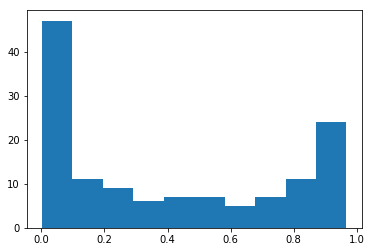

In [81]:
plt.hist(h, bins=10)

In [55]:
bom.check_account('@stschoberg')

{'cap': {'english': 0.001725457650971877, 'universal': 0.003626193494014071},
 'categories': {'content': 0.5534894514701189,
  'friend': 0.14231741345274818,
  'network': 0.269321703125012,
  'sentiment': 0.7757961689544536,
  'temporal': 0.27589464844196043,
  'user': 0.07248797510053138},
 'display_scores': {'content': 2.8,
  'english': 0.2,
  'friend': 0.7,
  'network': 1.3,
  'sentiment': 3.9,
  'temporal': 1.4,
  'universal': 0.4,
  'user': 0.4},
 'scores': {'english': 0.045343501437382056, 'universal': 0.0825396626774012},
 'user': {'id_str': '1636250282', 'screen_name': 'stschoberg'}}

In [56]:
my_followers=get_follower_list('stschoberg')

In [57]:
my_res={}
count=0
for screen_name, result in bom.check_accounts_in(my_followers):        
    count +=1
    my_res[screen_name] = result
    


In [58]:
h2=[]
for k,v in res.items():
    try:
        h2.append(v['cap']['english'])
    except:
        print("")

(array([38.,  9.,  6.,  7.,  4.,  8., 11.,  6., 16., 29.]),
 array([0.00121838, 0.09875994, 0.1963015 , 0.29384305, 0.39138461,
        0.48892617, 0.58646773, 0.68400929, 0.78155085, 0.8790924 ,
        0.97663396]),
 <a list of 10 Patch objects>)

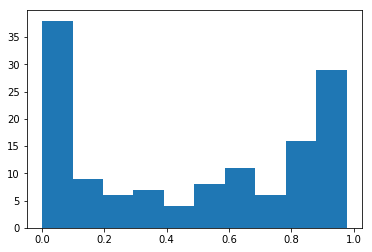

In [79]:
plt.hist(h2, bins=10)

In [70]:
top={}

for k,v in my_res.items():
    try:
        top[get_user_by_id(k)] =v['cap']['english']
    except KeyError:
        print()

In [72]:
def sorted_map(map):
    ms = (sorted(map.items(), key=operator.itemgetter(1)))
    return (ms)

In [73]:
top=sorted_map(top)

In [ ]:
top[-10:]

In [96]:
query = 'trump'
max_tweets = 500
searched_tweets = [status.user.screen_name for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

In [ ]:
trump_mentions={}
count=0
for screen_name, result in bom.check_accounts_in(searched_tweets):        
    count +=1
    trump_mentions[screen_name] = result

In [ ]:
trump_mentions=sorted_map(trump_mentions)
plt.hist(trump_mentions.values(), bins=10)